In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
# download nltk tool
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [4]:
# Initialize SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [5]:
# Load stock market news data
news_data = pd.read_csv("/content/drive/MyDrive/data_week-1/raw_analyst_ratings.csv")

news_data.head(5)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [10]:
# Calculate headline length (number of words and characters)
news_data['Headline_Length_Characters'] = news_data['headline'].apply(len)
news_data['Headline_Length_Words'] = news_data['headline'].apply(lambda x: len(x.split()))
news_data.head(5)

,Unnamed: 0,headline,url,publisher,date,stock,Sentiment_Score,Sentiment_Category,Headline_Length_Characters,Headline_Length_Words
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.000,Neutral,39,7
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.000,Neutral,42,7
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.000,Neutral,29,5
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.000,Neutral,44,7
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.296,Positive,87,14


In [15]:
# Count the number of articles per publisher
publisher_counts = news_data['publisher'].value_counts()
publisher_counts

,count
publisher,
Paul Quintaro,228373
Lisa Levin,186979
Benzinga Newsdesk,150484
Charles Gross,96732
Monica Gerson,82380
...,...
Shazir Mucklai - Imperium Group,1
Laura Jennings,1
Eric Martin,1


In [17]:
# Convert to a DataFrame for better readability
publisher_summary = publisher_counts.reset_index()
publisher_summary.columns = ['Publisher', 'Article_Count']
publisher_summary

,Publisher,Article_Count
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
...,...,...
1029,Shazir Mucklai - Imperium Group,1
1030,Laura Jennings,1
1031,Eric Martin,1
1032,Jose Rodrigo,1


In [18]:
# Convert 'date' to a datetime format
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')

In [20]:
# Remove rows with invalid dates (if any)
news_data = news_data.dropna(subset=['date'])

In [21]:
# Extract useful time components
news_data['Year'] = news_data['date'].dt.year
news_data['Month'] = news_data['date'].dt.month
news_data['Day'] = news_data['date'].dt.day
news_data['Day_of_Week'] = news_data['date'].dt.day_name()


In [22]:
# Analyze publication trends over time
daily_counts = news_data['date'].value_counts().sort_index()
weekly_counts = news_data.resample('W', on='date').size()  # Weekly aggregation
monthly_counts =news_data.resample('M', on='date').size()  # Monthly aggregation

<ipython-input-22-827dd879a773>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts =news_data.resample('M', on='date').size()  # Monthly aggregation


In [23]:
# Print basic statistics
print("Daily News Frequency Summary:")
print(daily_counts.describe())

Daily News Frequency Summary:
count    36011.000000
mean         1.554719
std          6.558143
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        845.000000
Name: count, dtype: float64


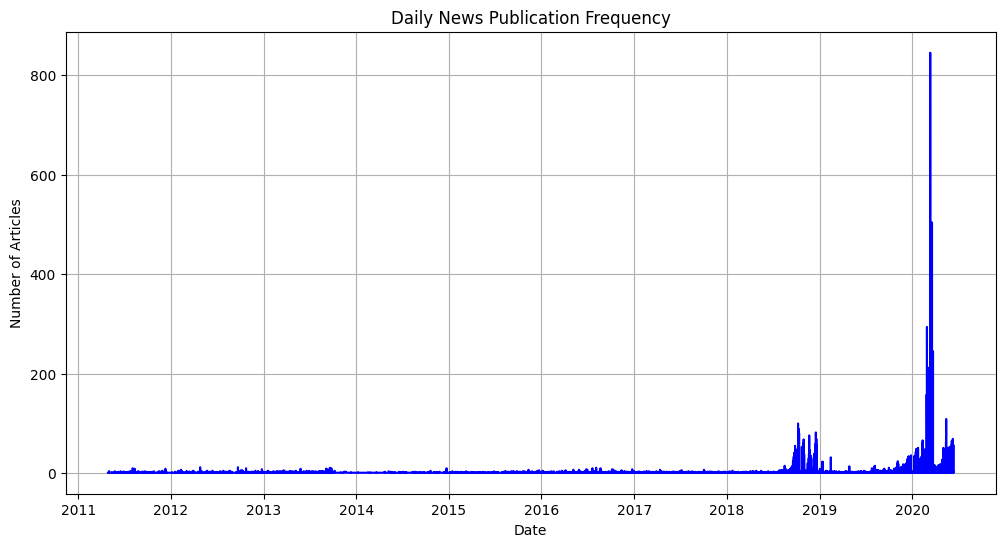

In [24]:
# Plot daily trends
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts.values, color='blue')
plt.title("Daily News Publication Frequency")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.grid()
plt.show()

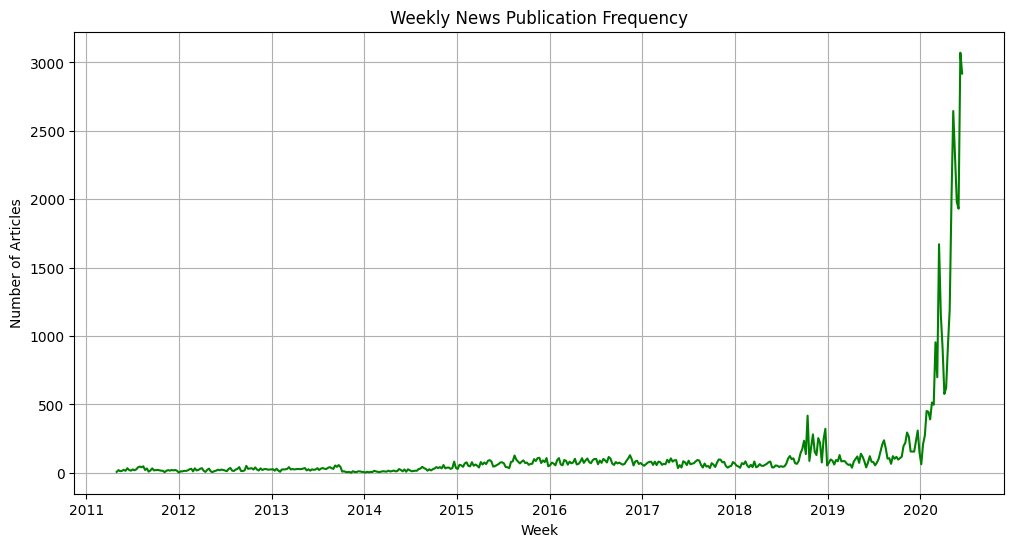

In [25]:
# Plot weekly trends
plt.figure(figsize=(12, 6))
plt.plot(weekly_counts.index, weekly_counts.values, color='green')
plt.title("Weekly News Publication Frequency")
plt.xlabel("Week")
plt.ylabel("Number of Articles")
plt.grid()
plt.show()

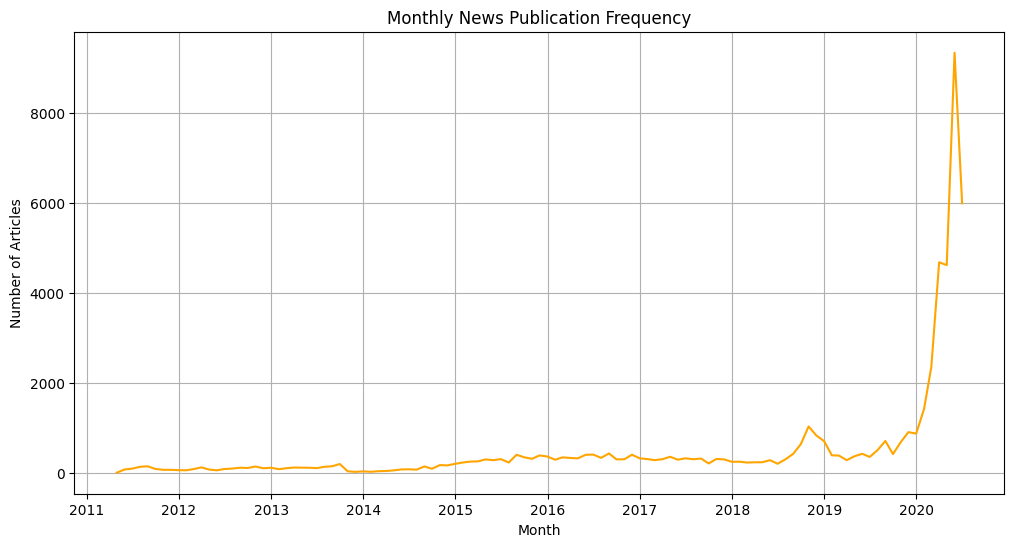

In [26]:
# Plot monthly trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, color='orange')
plt.title("Monthly News Publication Frequency")
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.grid()
plt.show()

In [27]:
# Analyze publication frequency by day of the week
day_of_week_counts = news_data['Day_of_Week'].value_counts()

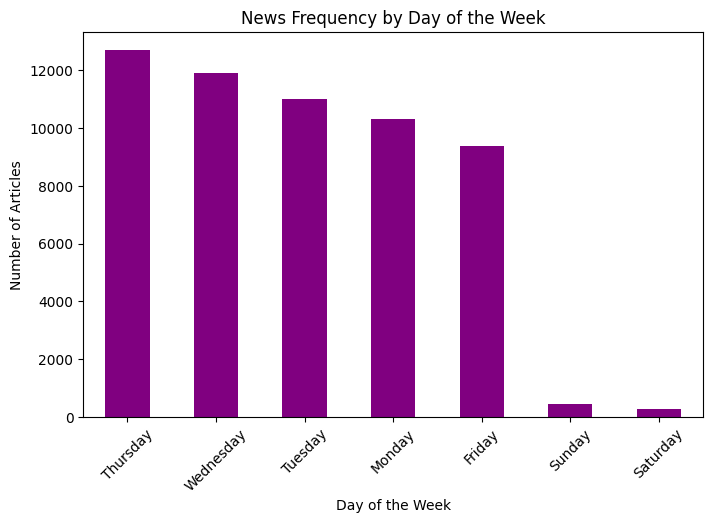

In [28]:
# Plot day-of-week trends
plt.figure(figsize=(8, 5))
day_of_week_counts.plot(kind='bar', color='purple')
plt.title("News Frequency by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()
